In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("kc_final.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data = data.iloc[:, 2:]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

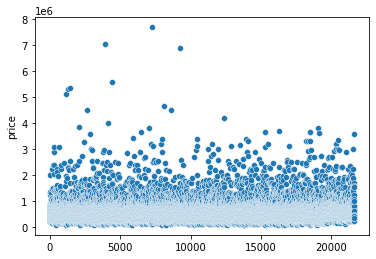

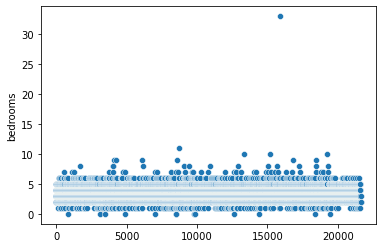

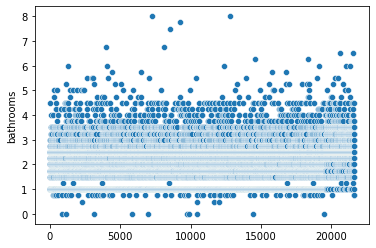

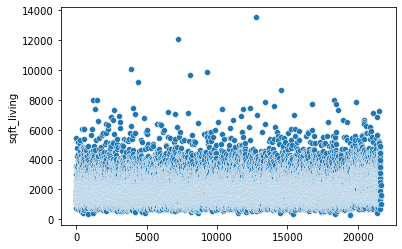

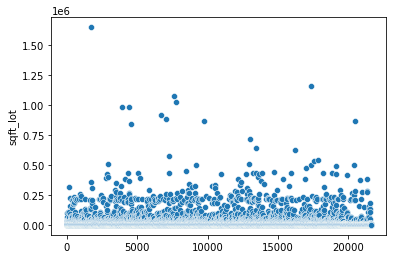

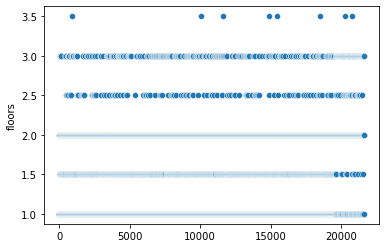

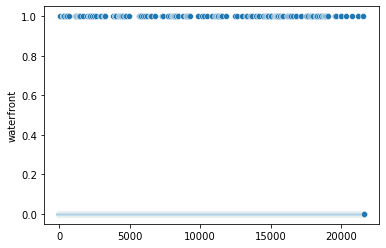

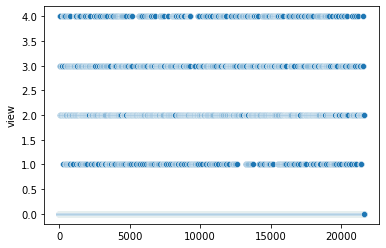

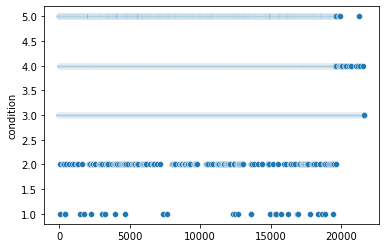

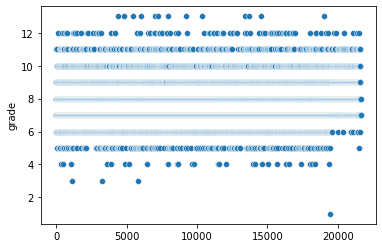

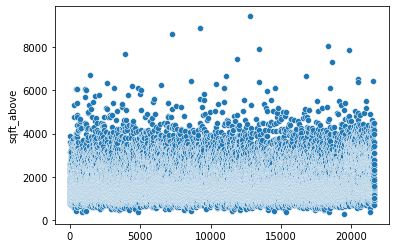

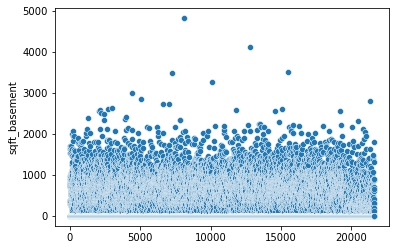

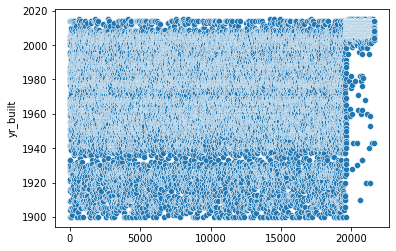

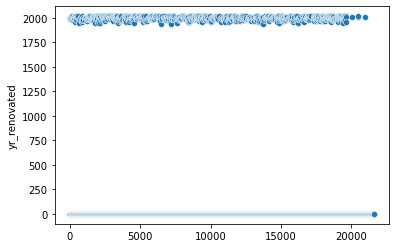

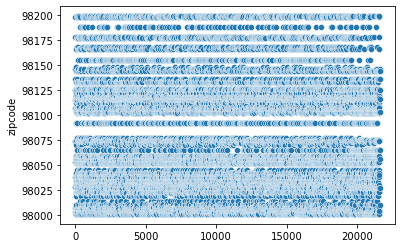

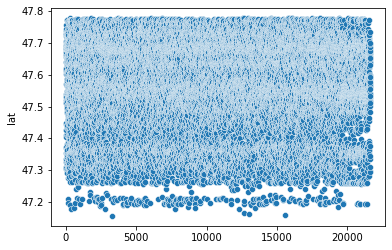

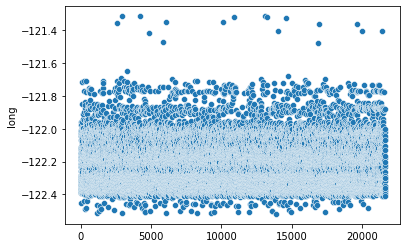

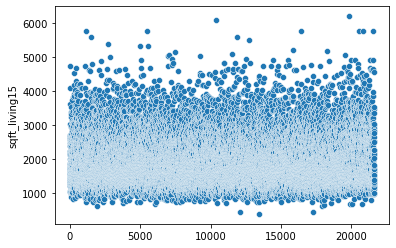

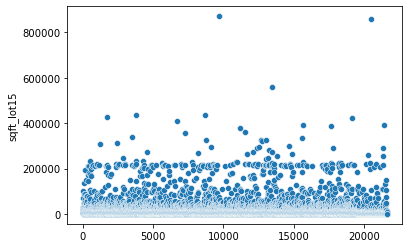

In [5]:
for column in data.columns:
    sns.scatterplot(data=data, x=data.index, y=column)
    plt.show()

In [6]:
index = data[data["bedrooms"] > 30].index
data.drop(index=index, inplace=True)

In [7]:
index = data[data["floors"] > 3].index
data.drop(index=index, inplace=True)

In [8]:
index = data[data["grade"] < 2].index
data.drop(index=index, inplace=True)

In [9]:
index = data[data["long"] > -121.6].index
data.drop(index=index, inplace=True)

In [10]:
columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]

In [11]:
for column in data[columns]:
    selected_column = data[column]
    
    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)
    
    iqr = q3 - q1
    
    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr
    
    max_idxs = data[selected_column > maximum].index
    min_idxs = data[selected_column < minimum].index
    
    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16704 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16704 non-null  float64
 1   bedrooms       16704 non-null  int64  
 2   bathrooms      16704 non-null  float64
 3   sqft_living    16704 non-null  int64  
 4   sqft_lot       16704 non-null  int64  
 5   floors         16704 non-null  float64
 6   waterfront     16704 non-null  int64  
 7   view           16704 non-null  int64  
 8   condition      16704 non-null  int64  
 9   grade          16704 non-null  int64  
 10  sqft_above     16704 non-null  int64  
 11  sqft_basement  16704 non-null  int64  
 12  yr_built       16704 non-null  int64  
 13  yr_renovated   16704 non-null  int64  
 14  zipcode        16704 non-null  int64  
 15  lat            16704 non-null  float64
 16  long           16704 non-null  float64
 17  sqft_living15  16704 non-null  int64  
 18  sqft_l

<AxesSubplot:>

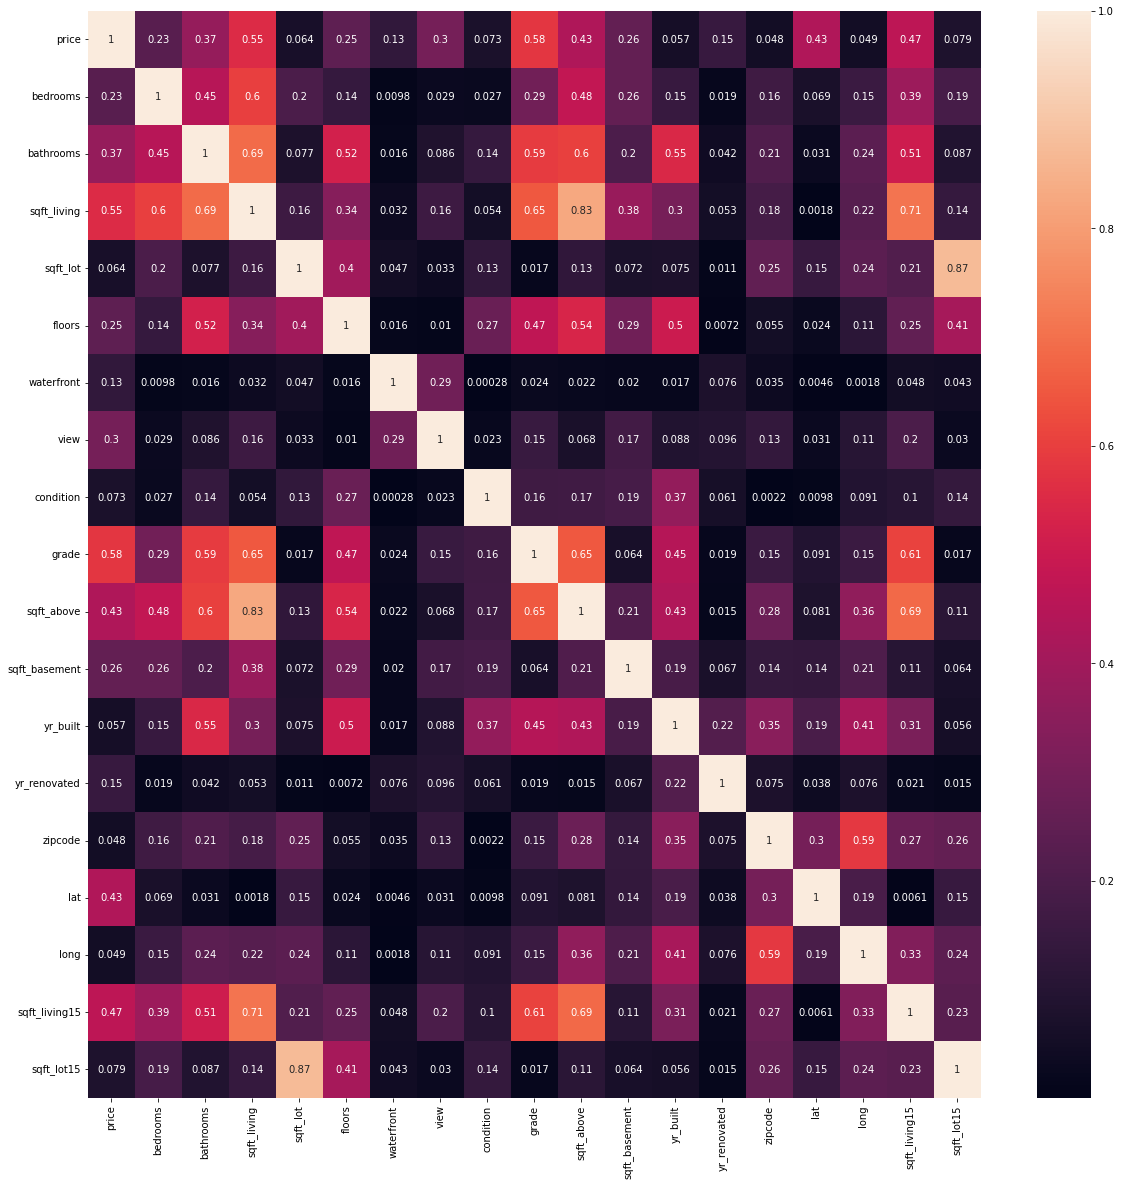

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().abs(), annot=True)

In [14]:
X = data.drop("price", axis=1)
y = data["price"]

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, random_state=0)
rfr.fit(Xtrain, ytrain)
rfr.score(Xtest, ytest)

0.8583101562100118

In [18]:
score1 = cross_val_score(rfr, X=Xtrain, y=ytrain, cv=4)
score1, score1.mean(), score1.std()

(array([0.86666806, 0.85908986, 0.83750956, 0.86004125]),
 0.8558271825838604,
 0.010971136456678415)

In [19]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(Xtrain, ytrain)
xgb.score(Xtest, ytest)

0.8619879362104237

In [20]:
score2 = cross_val_score(xgb, X=Xtrain, y=ytrain, cv=4)
score2, score2.mean(), score2.std()

(array([0.87284764, 0.86840697, 0.8539927 , 0.86173975]),
 0.8642467662428771,
 0.007118871978154505)